Dataset retrieved from: https://zenodo.org/record/1188976

In [1]:
pip install numpy==1.21.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 8.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
regression 1.0.5 requires numpy==1.23.3, but you have numpy 1.21.0 which is incompatible.
pandas 1.5.1 requires pytz>=2020.1, but you have pytz 2019.3 which is incompatible.
optimisation-algorithms 1.1.2 requires numpy==1.23.3, but you have numpy 1.21.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install opendatasets

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install librosa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 3.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.4/404.4 kB 6.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 8.5 MB/s eta 0:00:00a 0:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.0/377.0 kB 8.3 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for audioread: filename=audioread-3.0.0-py3-none-any.whl size=23703 sha256=5d050e6ade59829e0276c6954f72962646feee4960321dd9c1dd019126c20286
  Stored in directory: /Users/moiezqamar/Library/Caches/pip/wheels/e4/76/a4/cfb55573167a1f5bde7d7a348e95e509c64b2c3e8f921932c3
Successfully built audioread
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install fastai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.3/502.3 kB 2.3 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pytz
    Found existing installation: pytz 2019.3
    Uninstalling pytz-2019.3:
      Successfully uninstalled pytz-2019.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
py-imessage 1.7 requires pytz==2019.3, but you have pytz 2023.3 which is incompatible.
conda-repo-cli 1.0.24 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.24 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.
conda-repo-cli 1.0.24 requires PyYAML==6.0, but you have pyyaml 5.4.1 which is incompatible.


Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install sounddevice

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 2.2 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
from tqdm import tqdm

import matplotlib.pyplot as plt   # plotting
from matplotlib import image as mpimg

import librosa                    # Python package for music and audio analysis
import librosa.display            # Allows you to display audio files 
import os                         # The OS module in Python provides a way of 
                                  # using operating system dependent functionality.
import scipy.io.wavfile           # Open a WAV files
from scipy.io.wavfile import write

import numpy as np                # Used for working with arrays
import fastai                     
import glob                       # Used to return all file paths that match a specific 
                                  # pattern

import sounddevice as sd


# Import fast AI stuff
from fastai import *                                 
from fastai.vision.all import *
from fastai.vision.data import ImageDataLoaders
from fastai.tabular.all import *
from fastai.text.all import *
from fastai.vision.widgets import *

# DOWNLOAD DATASET

In [9]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio")
# use kaggle credentials

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: moiezqamar
Your Kaggle Key: ········


100%|████████████████████████████████████████| 429M/429M [00:44<00:00, 10.1MB/s]


# CREATE NEEDED DIRECTORIES

In [26]:
!rm -r "./ravdess-emotional-speech-audio/audio_speech_actors_01-24"

!mkdir './output'
!mkdir './output/live_images'

!mkdir './DATASET'
!mkdir './DATASET/angry'
!mkdir './DATASET/calm'
!mkdir './DATASET/disgust'
!mkdir './DATASET/fearful'
!mkdir './DATASET/neutral'
!mkdir './DATASET/sad'
!mkdir './DATASET/happy'
!mkdir './DATASET/surprised'

!mkdir './models'



rm: ./ravdess-emotional-speech-audio/audio_speech_actors_01-24: No such file or directory


# DEFINING THE PATHS

In [27]:
AUDIO_FOLDER = "./ravdess-emotional-speech-audio/*"
DATASET = "./DATASET/"


paths = [audioFile for actor in glob.glob(AUDIO_FOLDER) for audioFile in glob.glob(actor +'/*')]

result = [paths[i:i+10] for i in range(0, len(paths), 10)]


In [28]:
# emotions
dicts = {
    '01' : 'neutral', 
    '02' : 'calm', 
    '03' : 'happy', 
    '04' : 'sad', 
    '05' : 'angry', 
    '06' : 'fearful', 
    '07' : 'disgust', 
    '08' : 'surprised'
}

# RUN THIS CODE TO CLEAR THE DATASET FOLDER:

In [30]:
# clear the test1 and train1 folders:
directories = [DATASET] # specify the path to the directory

for directory in directories:
    for foldername in os.listdir(directory):
        folderpath = os.path.join(directory, foldername)
        if os.path.isdir(folderpath):
            for filename in os.listdir(folderpath):
                filepath = os.path.join(folderpath, filename)
                if os.path.isfile(filepath):
                    os.remove(filepath)

# CONVERT ALL AUDIO FILES TO MELSPECTROGRAM:

In [84]:
def convert_audio_to_melspectrogram(audioPath, savePath):

    # Load audio file and visualize its waveform (using librosa)
    # The `librosa.load()` function takes two arguments: the path to the audio file and the sample rate.
    # The sample rate is the number of samples per second in the audio file.
    x, sr = librosa.load(audioPath, sr=44100)

    # Trim the audio file to remove silence at the beginning and end.
    # The `librosa.effects.trim()` function takes two arguments: the audio signal and the threshold.
    # The threshold is the minimum amplitude that is considered to be non-silence.
    xt,_=librosa.effects.trim(x)                         

    x=xt

    # Plot the spectrogram.
    # The `librosa.stft()` function computes the short-time Fourier transform of the audio signal.
    # The `librosa.amplitude_to_db()` function converts the amplitude of the spectrogram to decibels.
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))

    # Apply log transformation on the loaded audio signals
    # The `librosa.display.specshow()` function plots the spectrogram.
    # The `sr` argument specifies the sample rate of the audio signal.
    # The `x_axis` argument specifies the axis along which the time is displayed.
    # The `y_axis` argument specifies the axis along which the frequency is displayed.
    librosa.display.specshow(Xdb, sr=sr, vmin=-60, vmax=60,x_axis='time', y_axis='log',cmap='magma', ax=None)

    #plt.colorbar()
    
    # Remove the axis
    plt.gca().get_xaxis().set_visible(False)
    plt.gca().get_yaxis().set_visible(False)
    
    # Save the figure.
    # The `plt.savefig()` function saves the figure to a file.
    # The `savePath` argument specifies the path to the file.
    plt.savefig(savePath)
    plt.clf()

In [85]:
# convert_audio_to_melspectrogram(result[0][0],"./output/sup")
# convert_audio_to_melspectrogram(result[0][1],"./output/sup")
# convert_audio_to_melspectrogram(result[0][2],"./output/sup")

In [86]:
# Convert the audio files to melspectrograms.
counts = {}
fileLoc=1
for path in result:
    files = tqdm(path)
    for audio_file_path in files:
        files.set_postfix_str(f"{fileLoc}/{len(result)}")
        
        emotion = dicts[audio_file_path[-18:-16]]
        
        count = counts.get(emotion, 1)
        
        # split up test and train data
        p = os.path.join(f"{DATASET}{emotion}", f"{emotion}{str(count).zfill(6)}.jpg")
        
        
        counts[emotion] = count + 1
        
        convert_audio_to_melspectrogram(audio_file_path, p)
    fileLoc+=1

100%|██████████████████████████████████| 10/10 [00:02<00:00,  3.49it/s, 101/144]


100%|██████████████████████████████████| 10/10 [00:03<00:00,  2.50it/s, 144/144]


<Figure size 640x480 with 0 Axes>

Of the following list of devices, select which one to use as your microphone:
> 0 MacBook Pro Microphone, Core Audio (1 in, 0 out)
< 1 MacBook Pro Speakers, Core Audio (0 in, 2 out)
>>>0
Recording...
...Done Recording


Predicted Emotion: sad


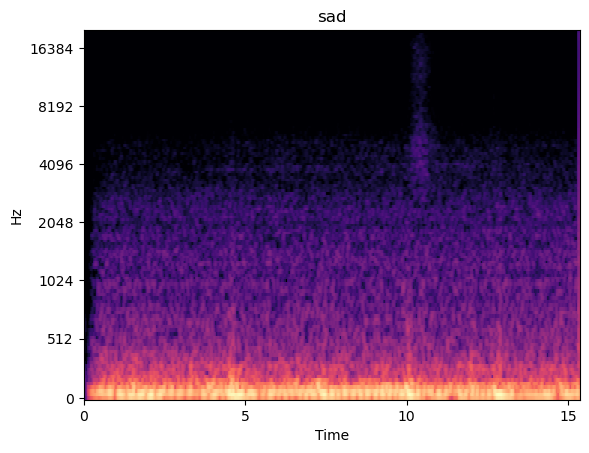


Continue? (Y/N): y
Recording...
...Done Recording


Predicted Emotion: sad


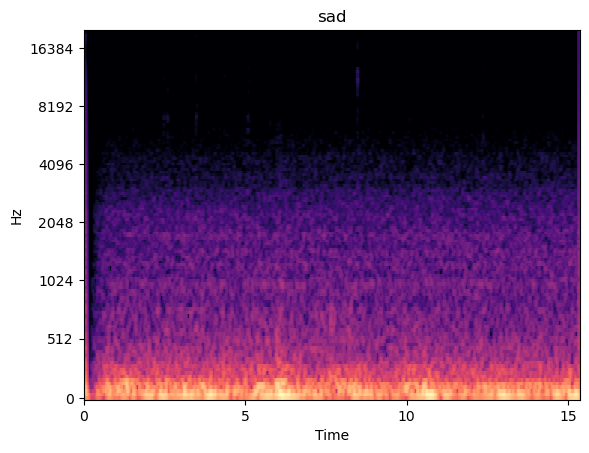


Continue? (Y/N): y
Recording...
...Done Recording


Predicted Emotion: sad


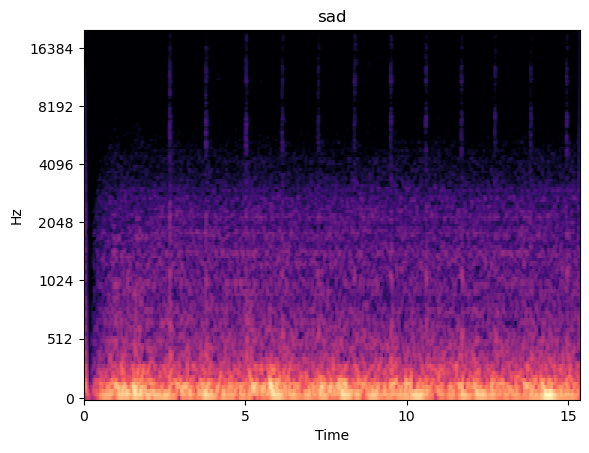


Continue? (Y/N): n


In [33]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

fs=44100
seconds=3
dtype = 'int16'
mic = int(input(f'Of the following list of devices, select which one to use as your microphone:\n{sd.query_devices()}\n>>>'))
count = 1

while true:
    
    print("Recording...")
    
    checkEmotion(count,mic, fs, seconds, dtype)
    
    cont = input("\nContinue? (Y/N): ")
    
    if cont == 'Y' or cont == 'y':
        count+=1
        continue
    else:
        break

In [ ]:
'''loss_functions = [CrossEntropyLossFlat(), LabelSmoothingCrossEntropy(),
                  FocalLossFlat()]
loss_functions1 = ["CrossEntropyLossFlat", "LabelSmoothingCrossEntropy",
                  "FocalLossFlat"]
train_size = [0.2, 0.4, 0.6]

for LF in range(0,3):
    for TS in range(0,3):
        print(f"___________{loss_functions1[LF]} ... {train_size[TS]}___________")
        dls = ImageDataLoaders.from_folder(train_path, valid_pct=train_size[TS], seed=5, num_workers=0)
        print(f"validation: {len(dls.valid_ds.items[:])}  |  training set: {len(dls.train_ds.items[:])}")

        learn = vision_learner(dls, models.resnet34, loss_func=loss_functions[LF], metrics=accuracy)
        lr_min, lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))
        print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

        learn.fit(10, float(f"{lr_steep:.2e}"))
        #interp = ClassificationInterpretation.from_learner(learn)
        #losses,idxs = interp.top_losses()
        #len(dls.valid_ds)==len(losses)==len(idxs)

        #interp.plot_confusion_matrix(figsize=(8,8), dpi=90)

        #interp.plot_top_losses(2, figsize=(10,11))
        
        print("\n")
'''

In [191]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from sklearn.metrics import confusion_matrix
import seaborn as sns

In [174]:
import pathlib
data_dir = pathlib.Path('./DATASET').with_suffix('')

In [175]:
data_dir

Path('DATASET')

In [176]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

1440


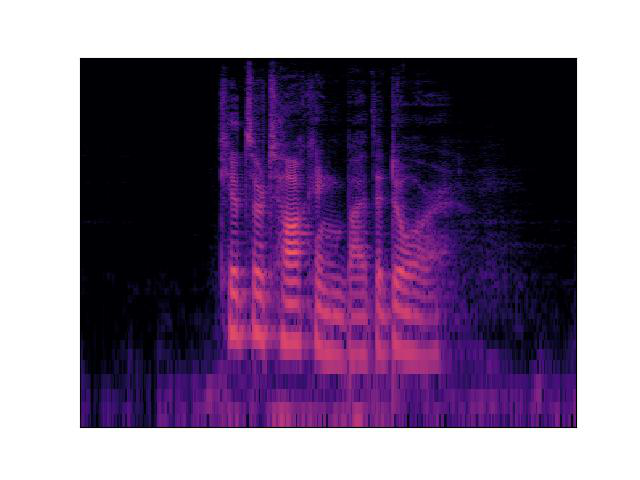

In [177]:
anger = list(data_dir.glob('angry/*'))
PIL.Image.open(str(anger[0]))
PIL.Image.open(str(anger[1]))

calm = list(data_dir.glob('calm/*'))
PIL.Image.open(str(calm[0]))
PIL.Image.open(str(calm[1]))

In [178]:
batch_size = 32
img_height = 240
img_width = 320

In [179]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1440 files belonging to 8 classes.
Using 1152 files for training.


In [180]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1440 files belonging to 8 classes.
Using 288 files for validation.


In [181]:
class_names = train_ds.class_names
print(class_names)

['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


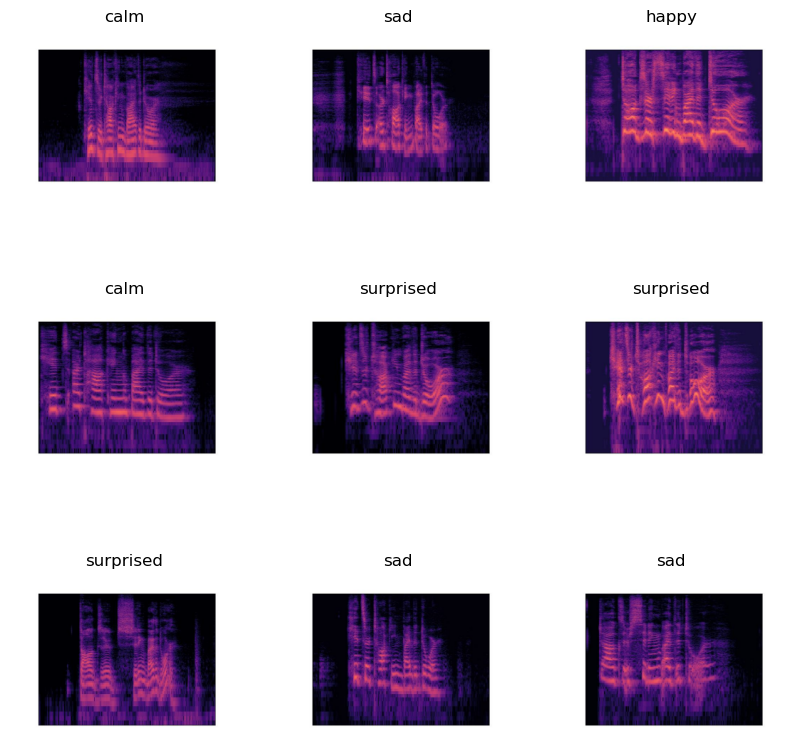

In [182]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [183]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 240, 320, 3)
(32,)


In [184]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [185]:
normalization_layer = layers.Rescaling(1./255)

In [186]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [187]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [188]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [189]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_11 (Rescaling)    (None, 240, 320, 3)       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 240, 320, 16)      448       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 120, 160, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 120, 160, 32)      4640      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 60, 80, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 60, 80, 64)       

In [190]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
36/36 [==============================] - 34s 944ms/step - loss: 2.3667 - accuracy: 0.2179 - val_loss: 1.8792 - val_accuracy: 0.2812
Epoch 2/10
36/36 [==============================] - 37s 1s/step - loss: 1.7701 - accuracy: 0.2908 - val_loss: 1.8514 - val_accuracy: 0.2569
Epoch 3/10
36/36 [==============================] - 34s 945ms/step - loss: 1.6811 - accuracy: 0.3438 - val_loss: 1.8305 - val_accuracy: 0.2708
Epoch 4/10
36/36 [==============================] - 35s 988ms/step - loss: 1.5234 - accuracy: 0.4280 - val_loss: 1.8677 - val_accuracy: 0.2708
Epoch 5/10
36/36 [==============================] - 34s 945ms/step - loss: 1.3623 - accuracy: 0.4957 - val_loss: 1.6135 - val_accuracy: 0.4062
Epoch 6/10
36/36 [==============================] - 31s 858ms/step - loss: 1.1375 - accuracy: 0.5981 - val_loss: 1.6212 - val_accuracy: 0.4132
Epoch 7/10
36/36 [==============================] - 30s 846ms/step - loss: 0.9344 - accuracy: 0.6641 - val_loss: 1.5708 - val_accuracy: 0.4444
Ep

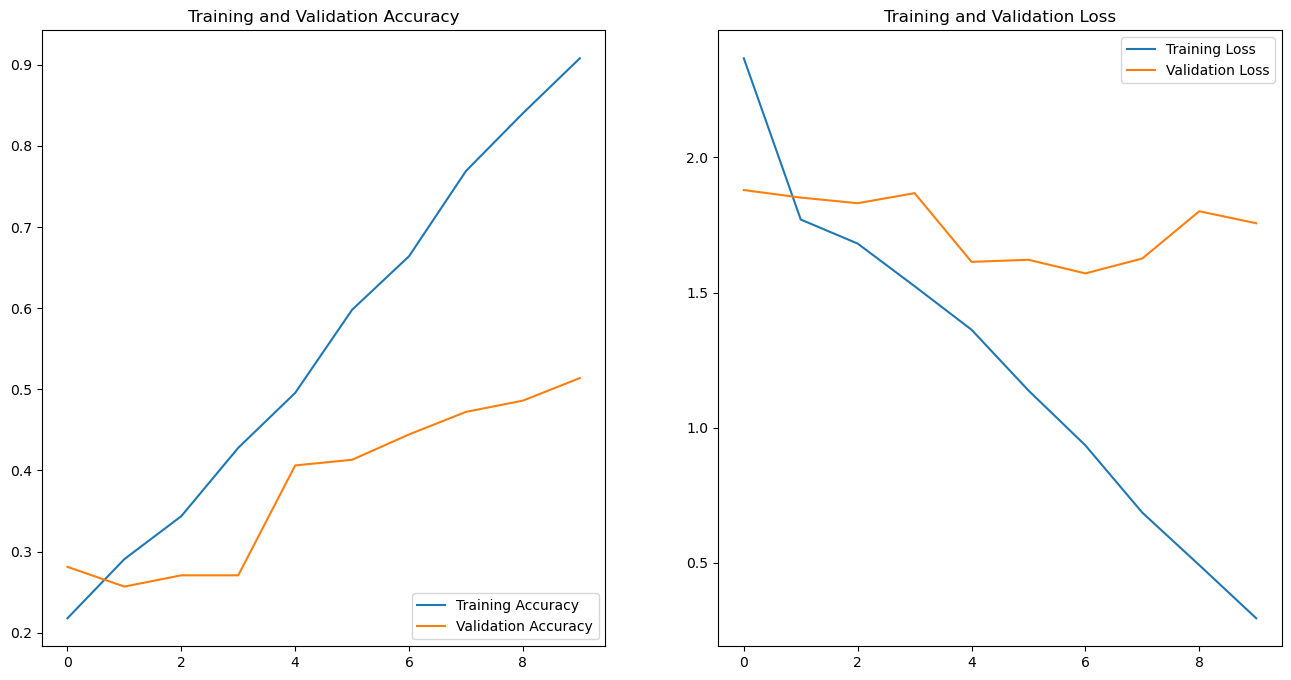

In [192]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

9/9 [==============================] - 2s 228ms/step


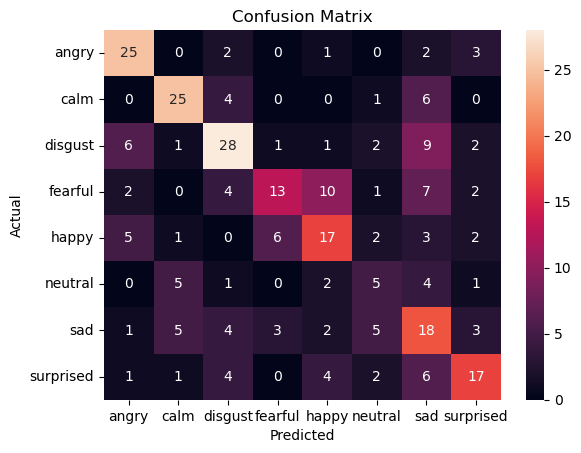

In [193]:
# Get the predictions from the model
predictions = model.predict(val_ds)
predicted_classes = np.argmax(predictions, axis=1)

# Get the true labels
true_labels = []
for images, labels in val_ds:
    true_labels.extend(labels.numpy())

# Create the confusion matrix
cm = confusion_matrix(true_labels, predicted_classes)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

In [150]:
# Fight overfitting by using data augmentation
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [151]:
import warnings
warnings.filterwarnings('ignore')

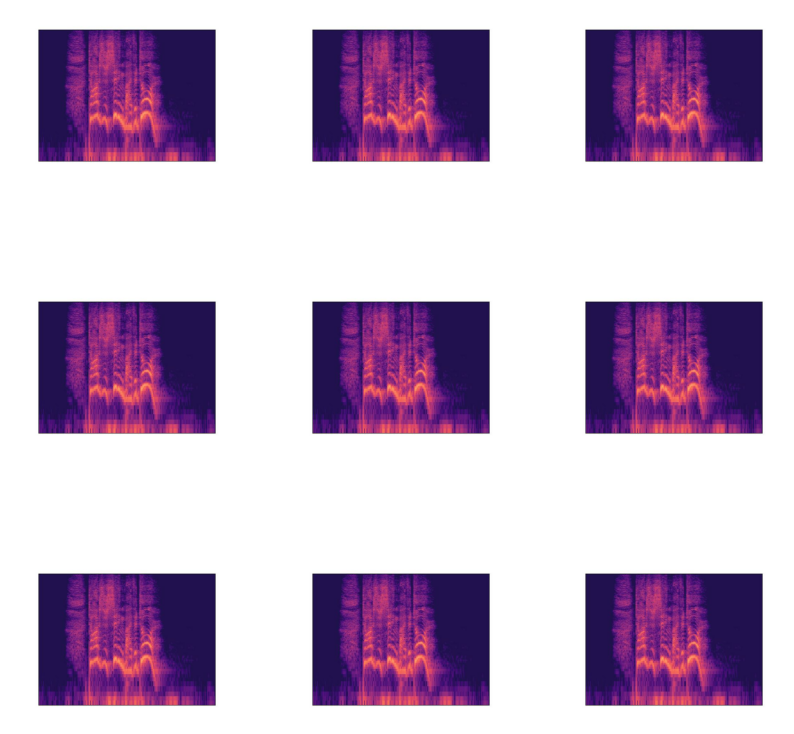

In [152]:


plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")
        


In [153]:
# Utilizing Dropout
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [154]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [155]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_7 (Sequential)   (None, 480, 640, 3)       0         
                                                                 
 rescaling_9 (Rescaling)     (None, 480, 640, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 480, 640, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 240, 320, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 240, 320, 32)      4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 120, 160, 32)     0         
 g2D)                                                 

In [156]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15


36/36 [==============================] - 208s 6s/step - loss: 3.7824 - accuracy: 0.1667 - val_loss: 2.0148 - val_accuracy: 0.1632
Epoch 2/15
36/36 [==============================] - 163s 5s/step - loss: 1.9218 - accuracy: 0.2274 - val_loss: 1.9252 - val_accuracy: 0.2292
Epoch 3/15
36/36 [==============================] - 154s 4s/step - loss: 1.8348 - accuracy: 0.2700 - val_loss: 1.8931 - val_accuracy: 0.2569
Epoch 4/15
36/36 [==============================] - 156s 4s/step - loss: 1.7951 - accuracy: 0.2812 - val_loss: 1.9003 - val_accuracy: 0.2639
Epoch 5/15
36/36 [==============================] - 156s 4s/step - loss: 1.7645 - accuracy: 0.2873 - val_loss: 1.9284 - val_accuracy: 0.2361
Epoch 6/15
36/36 [==============================] - 157s 4s/step - loss: 1.7268 - accuracy: 0.3082 - val_loss: 1.9100 - val_accuracy: 0.2535
Epoch 7/15
36/36 [==============================] - 155s 4s/step - loss: 1.6767 - accuracy: 0.3559 - val_loss: 1.8403 - val_accuracy: 0.2569
Epoch 8/15
36/36 [======

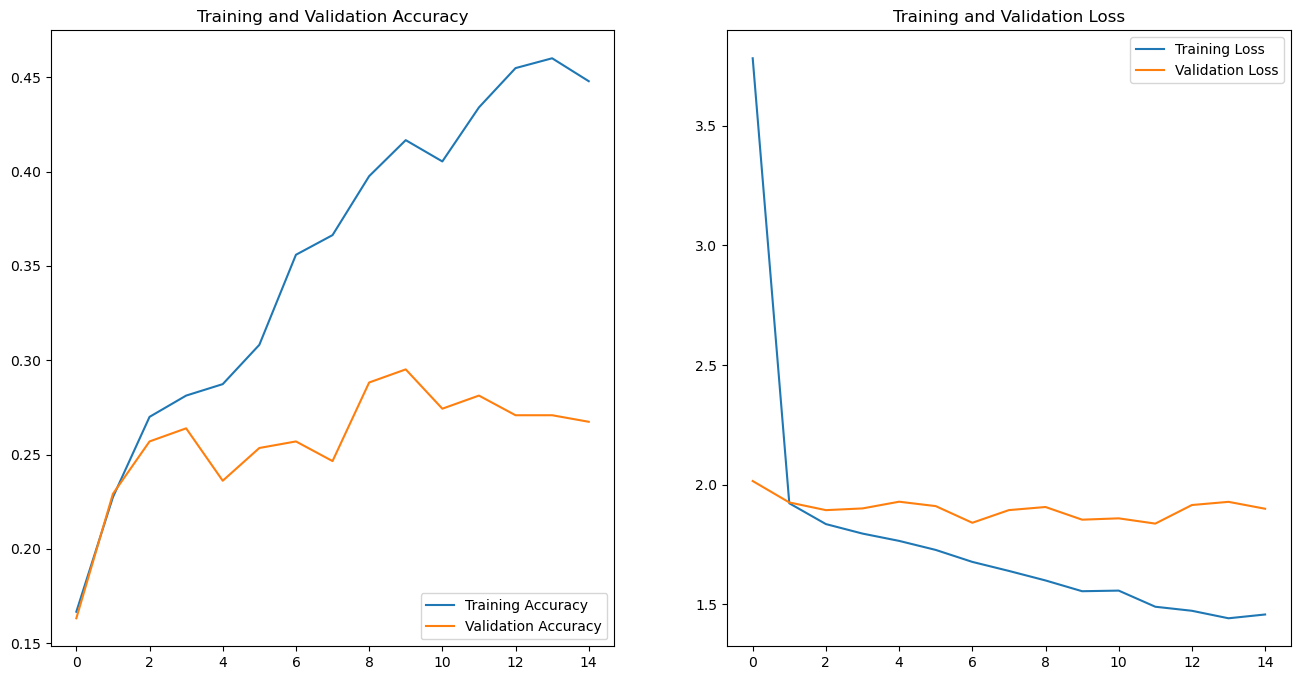

In [159]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Get the predictions from the model
predictions = model.predict(val_ds)
predicted_classes = np.argmax(predictions, axis=1)

# Get the true labels
true_labels = []
for images, labels in val_ds:
    true_labels.extend(labels.numpy())

# Create the confusion matrix
cm = confusion_matrix(true_labels, predicted_classes)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

In [166]:
location = './DATASET/angry/angry000001.jpg'
#file_path = tf.keras.utils.get_file('thingo', origin=location)

#img = pathlib.Path('./DATASET/angry/angry000001.jpg')

img = tf.keras.utils.load_img(
   location, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])



sorted_predictions = np.argsort(score)[::-1]

# Take the top five predictions.
top_predictions = sorted_predictions[:5]

# Print the top five predictions.
for i in range(len(top_predictions)):
    print(
        "The image most likely belongs to {} with a {:.4f} percent confidence."
        .format(class_names[top_predictions[i]], 100 * score[top_predictions[i]])
    )

1/1 [==============================] - 0s 79ms/step
The image most likely belongs to fearful with a 25.3286 percent confidence.
The image most likely belongs to angry with a 22.0573 percent confidence.
The image most likely belongs to surprised with a 20.7071 percent confidence.
The image most likely belongs to happy with a 14.3433 percent confidence.
The image most likely belongs to disgust with a 11.8499 percent confidence.
